In [2]:
# EJEMPLO DE REGRESION LINEAL

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [5]:
data = pd.read_csv('sample_data/tips.csv')
# Drop the missing values
data = data.dropna()
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
train_input = np.array(data.total_bill[:200]).reshape(200, 1)
train_output = np.array(data.tip[:200]).reshape(200, 1)
test_input = np.array(data.total_bill[200:]).reshape(len(data) - 200, 1)
test_output = np.array(data.tip[200:]).reshape(len(data) - 200, 1)

In [7]:
class LinearRegression:
	def __init__(self):
		self.parameters = {}
	def forward_propagation(self, train_input):
		m = self.parameters['m']
		c = self.parameters['c']
		predictions = np.multiply(m, train_input) + c
		return predictions
	def cost_function(self, predictions, train_output):
		cost = np.mean((train_output - predictions) ** 2)
		return cost
	def backward_propagation(self, train_input, train_output, predictions):
		derivatives = {}
		df = (train_output - predictions) * -1
		dm = np.mean(np.multiply(train_input, df))
		dc = np.mean(df)
		derivatives['dm'] = dm
		derivatives['dc'] = dc
		return derivatives
	def update_parameters(self, derivatives, learning_rate):
		self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
		self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']
	def train(self, train_input, train_output, learning_rate, iters):
		#initialize random parameters
		self.parameters['m'] = np.random.uniform(0,1) * -1
		self.parameters['c'] = np.random.uniform(0,1) * -1
		#initialize loss
		self.loss = []
		#iterate
		for i in range(iters):
			#forward propagation
			predictions = self.forward_propagation(train_input)
			#cost function
			cost = self.cost_function(predictions, train_output)
			#append loss and print
			self.loss.append(cost)
			print("Iteration = {}, Loss = {}".format(i+1, cost))
			#back propagation
			derivatives = self.backward_propagation(train_input, train_output, predictions)
			#update parameters
			self.update_parameters(derivatives, learning_rate)
		return self.parameters, self.loss

Iteration = 1, Loss = 18.50760894423138
Iteration = 2, Loss = 16.929457788472938
Iteration = 3, Loss = 15.496789037869021
Iteration = 4, Loss = 14.196191220793683
Iteration = 5, Loss = 13.015489218371652
Iteration = 6, Loss = 11.94363028980301
Iteration = 7, Loss = 10.970580604581343
Iteration = 8, Loss = 10.087231313014595
Iteration = 9, Loss = 9.285313275748722
Iteration = 10, Loss = 8.557319654053453
Iteration = 11, Loss = 7.896435636216278
Iteration = 12, Loss = 7.296474642193891
Iteration = 13, Loss = 6.751820409315096
Iteration = 14, Loss = 6.257374416883308
Iteration = 15, Loss = 5.8085081575057345
Iteration = 16, Loss = 5.4010198083478596
Iteration = 17, Loss = 5.031094896700808
Iteration = 18, Loss = 4.695270591640999
Iteration = 19, Loss = 4.390403287506397
Iteration = 20, Loss = 4.113639175729253


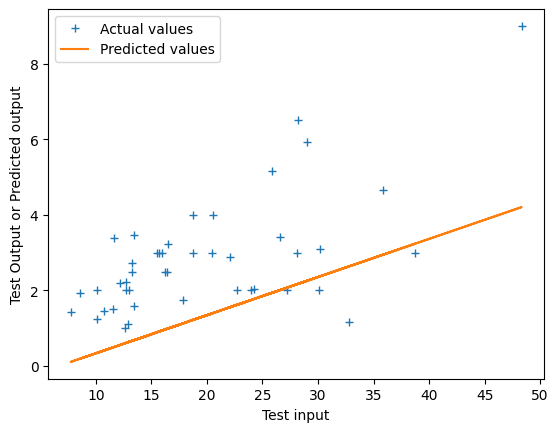

In [8]:
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)
#Prediction on test data
y_pred = test_input*parameters['m'] + parameters['c']
# Plot the regression line with actual data pointa
plt.plot(test_input, test_output, '+', label='Actual values')
plt.plot(test_input, y_pred, label='Predicted values')
plt.xlabel('Test input')
plt.ylabel('Test Output or Predicted output')
plt.legend()
plt.show()